<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [20]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------

$$A = \int_{\phi = 0}^{\phi = \pi} \int_{\theta = 0}^{\theta = 2\pi} R^2 \sin(\phi) \, d\theta \, d\phi $$

Where:
-  R is the radius at a point on the ellipsoid, defined as $R = \sqrt{\frac{x^2+y^2}{\beta^2}+\frac{z^2}{c^2}}$
- $\phi$ ranges from 0 to $\pi$ representing the polar angle.
- $\theta$ ranges from 0 to $2\pi$ representing the azimuthal angle.

-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


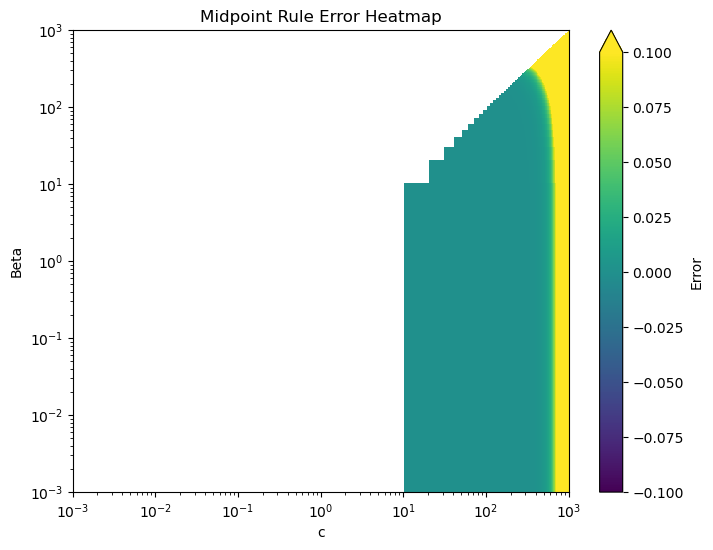

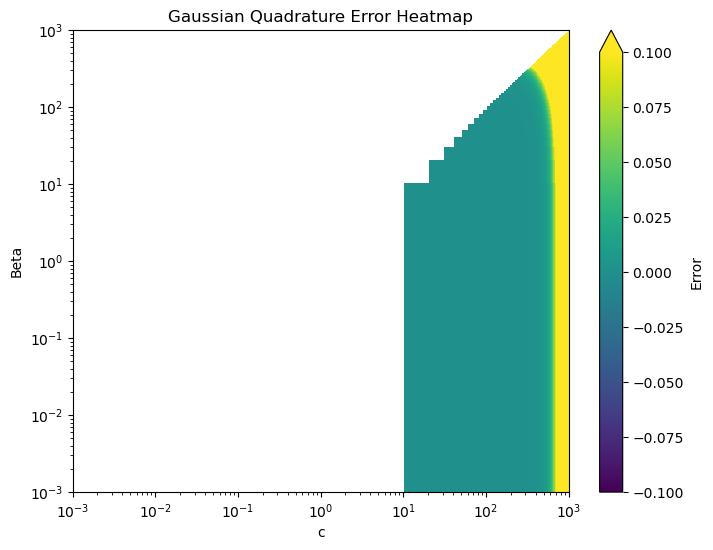

'--------------------Write your code above this line------------------------------'

In [21]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy.special import roots_legendre

def surface_area(beta, c):
    e = 1 - (beta ** 2) / (c ** 2)
    if e <= 0 or e > 1:
        return np.nan  # Return NaN for invalid values of e
    else:
        return 2 * np.pi * beta ** 2 * (1 + c / (beta * np.sqrt(e)) * np.arcsin(np.sqrt(e)))

def midpoint_rule(func, a, b, n):
    h = (b - a) / n
    integral = 0.0
    for i in range(n):
        x_mid = (a + (i + 0.5) * h)
        integral += func(x_mid)
    integral *= h
    return integral

def gaussian_quadrature(func, a, b, n):
    x, w = roots_legendre(n)
    integral = 0.0
    for i in range(n):
        integral += w[i] * func(0.5 * ((b - a) * x[i] + (b + a)))
    integral *= 0.5 * (b - a)
    return integral

betas = np.logspace(-3, 3, 100)
cs = np.logspace(-3, 3, 100)

errors_midpoint = np.zeros((len(betas), len(cs)))
errors_gaussian = np.zeros((len(betas), len(cs)))

for i, beta in enumerate(betas):
    for j, c in enumerate(cs):
        exact_area = surface_area(beta, c)
        
        approx_midpoint = midpoint_rule(lambda phi: beta * c * np.sin(phi), 0, np.pi, 100)
        errors_midpoint[i, j] = abs(approx_midpoint - exact_area)
        
        approx_gaussian = gaussian_quadrature(lambda phi: beta * c * np.sin(phi), 0, np.pi, 5)
        errors_gaussian[i, j] = abs(approx_gaussian - exact_area)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(errors_midpoint, extent=[np.min(cs), np.max(cs), np.min(betas), np.max(betas)],
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Error', extend='max')
plt.clim(vmin=0, vmax=np.max(errors_midpoint))
plt.title('Midpoint Rule Error Heatmap')
plt.xlabel('c')
plt.ylabel('Beta')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(errors_gaussian, extent=[np.min(cs), np.max(cs), np.min(betas), np.max(betas)],
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Error', extend='max')
plt.clim(vmin=0, vmax=np.max(errors_gaussian)) 
plt.title('Gaussian Quadrature Error Heatmap')
plt.xlabel('c')
plt.ylabel('Beta')
plt.xscale('log')
plt.yscale('log')
plt.show()

'''--------------------Write your code above this line------------------------------'''

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



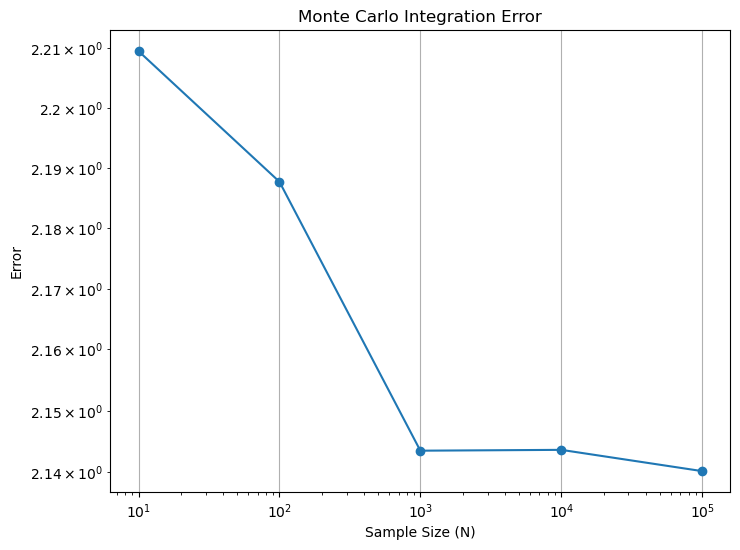

'--------------------Write your code above this line------------------------------'

In [22]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def surface_area(x, beta, c):
    return beta * c * np.sin(x)

def monte_carlo_integration(func, a, b, num_samples, beta, c):
    integral = 0.0
    for _ in range(num_samples):
        x = np.random.uniform(a, b)
        integral += func(x, beta, c)
    integral *= (b - a) / num_samples
    return integral

a = 0
b = np.pi
beta = 1/2
c = 1
exact_area = 2 * np.pi * beta ** 2 * (1 + c)

sample_sizes = [10, 100, 1000, 10000, 100000]

errors = []
for N in sample_sizes:
    approx_area = monte_carlo_integration(surface_area, a, b, N, beta, c)
    error = abs(approx_area - exact_area)
    errors.append(error)

plt.figure(figsize=(8, 6))
plt.loglog(sample_sizes, errors, marker='o', linestyle='-')
plt.title('Monte Carlo Integration Error')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



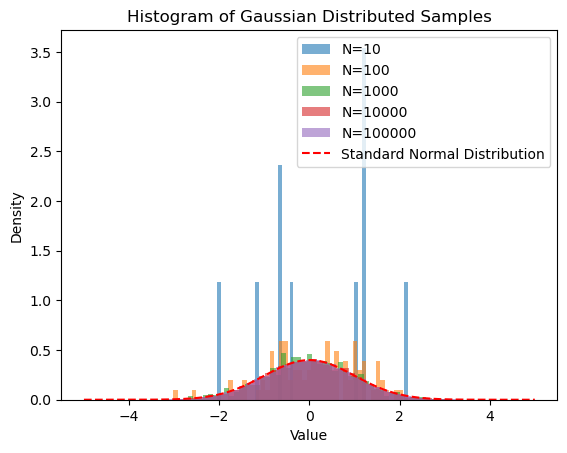

'--------------------Write your code above this line------------------------------'

In [23]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def box_muller(mu, sigma, n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z0 * sigma + mu, z1 * sigma + mu

sample_sizes = [10, 100, 1000, 10000, 100000]

mu = 0
sigma = 1

for n in sample_sizes:
    samples, _ = box_muller(mu, sigma, n)
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f'N={n}')

x = np.linspace(-5, 5, 1000)
plt.plot(x, 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * ((x - mu) / sigma)**2), color='red', linestyle='--', label='Standard Normal Distribution')
    
plt.title('Histogram of Gaussian Distributed Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





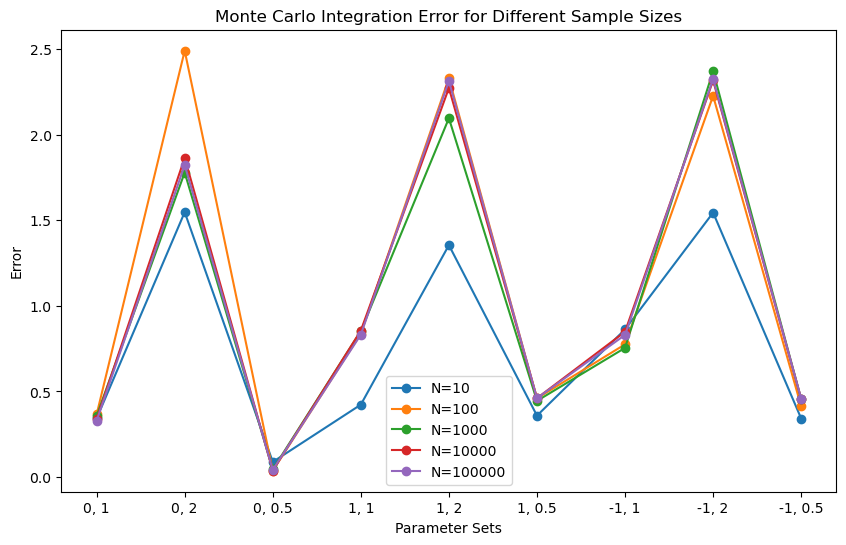

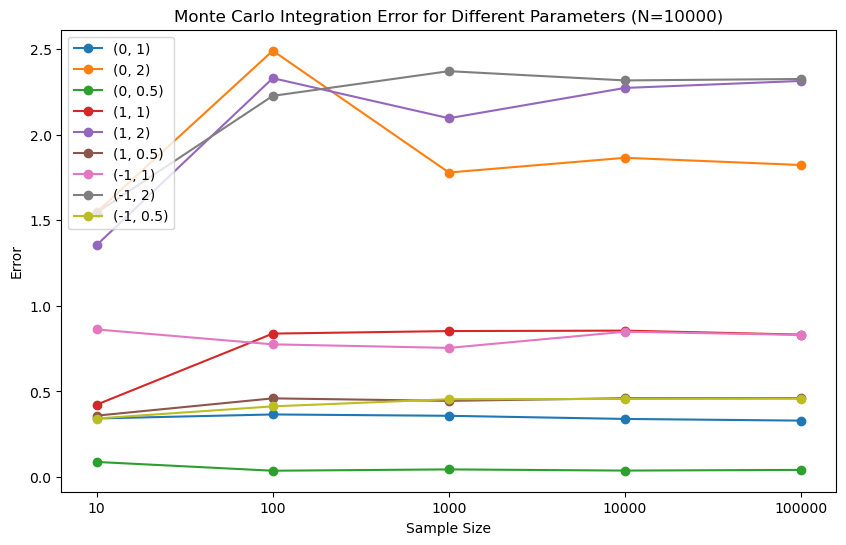

'--------------------Write your code above this line------------------------------'

In [24]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 

# Monte Carlo integration with Gaussian-distributed samples
def monte_carlo_integration(mu, sigma, a, b, num_samples):
    samples = np.random.normal(mu, sigma, num_samples)
    integral = np.mean(f(samples))
    return integral * (b - a)

# Range for integration
a = 1/2
b = 1

# Sample sizes
sample_sizes = [10, 100, 1000, 10000, 100000]

mus = [0, 1, -1]  
sigmas = [1, 2, 0.5]  

errors_sample_sizes = {}
errors_parameters = {}

for N in sample_sizes:
    errors_sample_sizes[N] = []
    for mu in mus:
        for sigma in sigmas:
            approx_integral = monte_carlo_integration(mu, sigma, a, b, N)
            exact_integral = (b - a) * (b**3) / 3 
            error = abs(approx_integral - exact_integral)
            errors_parameters[(mu, sigma)] = errors_parameters.get((mu, sigma), []) + [error]
            errors_sample_sizes[N].append(error)

plt.figure(figsize=(10, 6))
for N, errors in errors_sample_sizes.items():
    plt.plot(range(len(mus) * len(sigmas)), errors, marker='o', linestyle='-', label=f'N={N}')

plt.xlabel('Parameter Sets')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error for Different Sample Sizes')
plt.xticks(ticks=range(len(mus) * len(sigmas)), labels=[f'{mu}, {sigma}' for mu in mus for sigma in sigmas])
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for params, errors in errors_parameters.items():
    plt.plot(range(1, len(sample_sizes) + 1), errors, marker='o', linestyle='-', label=f'{params}')

plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error for Different Parameters (N=10000)')
plt.xticks(ticks=range(1, len(sample_sizes) + 1), labels=[str(N) for N in sample_sizes])
plt.legend()
plt.show()


'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

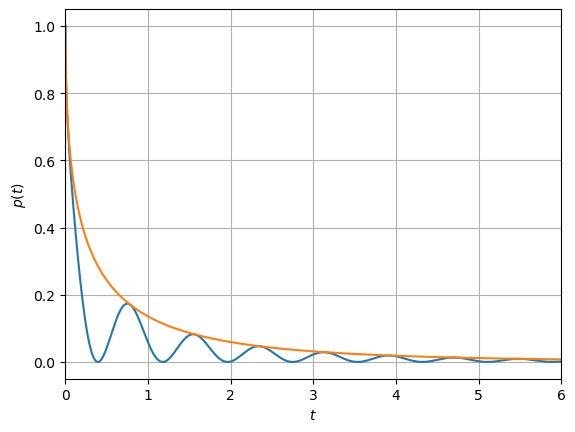

In [25]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



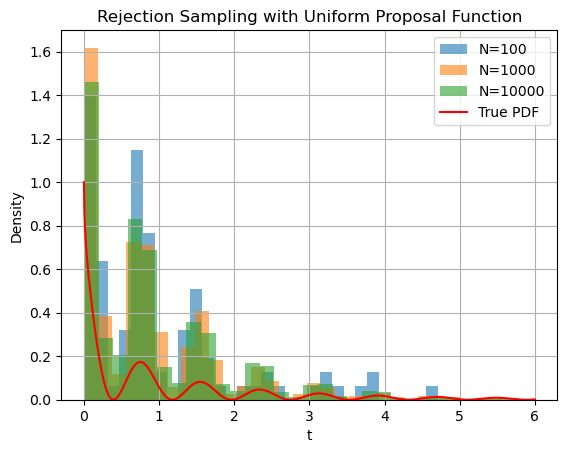

'--------------------Write your code above this line------------------------------'

In [26]:
'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

def pdf(t, a, b):
    return np.exp(-b * t) * np.cos(a * t)**2

def rejection_sampling(N, a, b, tf):
    samples = []
    max_pdf = 2.0  # Initialize with a value greater than the maximum PDF value
    while len(samples) < N:
        t = np.random.uniform(0, tf)
        u = np.random.uniform(0, max_pdf)
        if u < pdf(t, a, b):
            samples.append(t)
            max_pdf = max(max_pdf, pdf(t, a, b))  # Update max_pdf if a larger value is encountered
    return np.array(samples)

# Parameters
a = 4
b = 1  # Given a=4b, so b=1 for a=4
N_values = [100, 1000, 10000]
tf = 6  # A value slightly higher than the maximum of the PDF within the plotted range

# Generate samples and plot histograms for different sample sizes
for N in N_values:
    samples = rejection_sampling(N, a, b, tf)
    plt.hist(samples, bins=30, density=True, alpha=0.6, label=f'N={N}')

# Plot the true PDF for comparison
t = np.linspace(0, 6, 1000)
true_pdf = np.exp(-2 * np.sqrt(t)) * np.cos(4 * t)**2
plt.plot(t, true_pdf, 'r-', label='True PDF')

plt.xlabel('t')
plt.ylabel('Density')
plt.title('Rejection Sampling with Uniform Proposal Function')
plt.legend()
plt.grid(True)
plt.show()

#tf is informed by the max pdf value that we observe on the graph- we want it to hold a significant portion of the data

'''--------------------Write your code above this line------------------------------'''

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


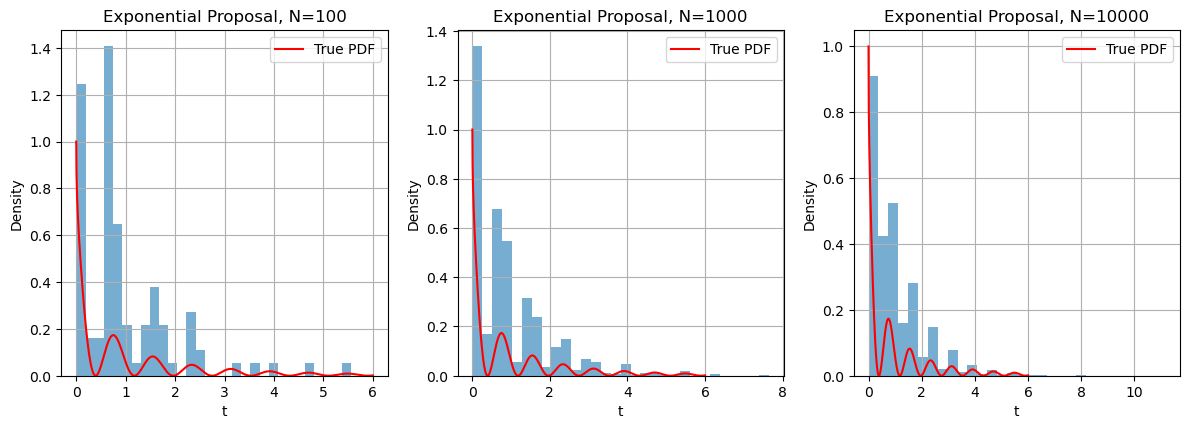

'--------------------Write your code above this line------------------------------'

In [27]:
'''--------------------Write your code below this line------------------------------'''

def exponential_proposal_sampling(N, a, b, tf):
    samples = []
    max_pdf = 2.0 
    while len(samples) < N:
        t = np.random.exponential(1)
        u = np.random.uniform(0, max_pdf)
        if u < pdf(t, a, b) / np.exp(-t):  
            samples.append(t)
            max_pdf = max(max_pdf, pdf(t, a, b)) 
    return np.array(samples)

N_values = [100, 1000, 10000]

plt.figure(figsize=(12, 8))
for i, N in enumerate(N_values):
    samples = exponential_proposal_sampling(N, a=4, b=1, tf=10)  # Choosing tf as 10
    plt.subplot(2, 3, i + 1)
    plt.hist(samples, bins=30, density=True, alpha=0.6)
    plt.title(f'Exponential Proposal, N={N}')
    plt.xlabel('t')
    plt.ylabel('Density')
    plt.grid(True)

    t = np.linspace(0, 6, 1000)
    true_pdf = np.exp(-2 * np.sqrt(t)) * np.cos(4 * t)**2
    plt.plot(t, true_pdf, 'r-', label='True PDF')
    plt.legend()

plt.tight_layout()
plt.show()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 


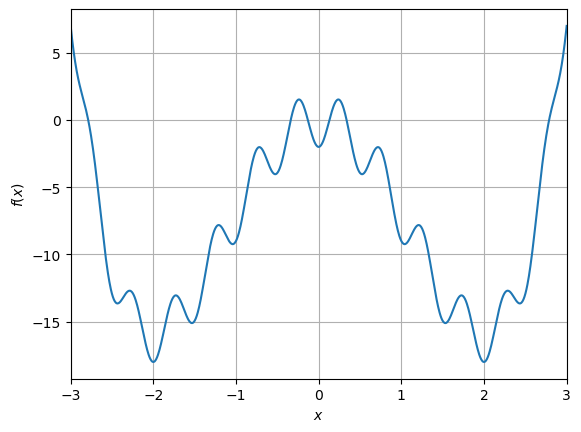

In [28]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

In [29]:
'''--------------------Write your code below this line------------------------------'''
import matplotlib.pyplot as plt
import numpy as np
import os

def objective_function(theta):
    return theta**4 - 8 * theta**2 - 2 * np.cos(4 * np.pi * theta)

def derivative_function(theta):
    return 4 * theta**3 - 16 * theta + 8 * np.pi * np.sin(4 * np.pi * theta)

def gradient_descent(initial_theta, learning_rate, epsilon=1e-5, max_iterations=1000):
    theta = initial_theta
    iteration = 0
    theta_list = [theta]
    
    while iteration < max_iterations:
        gradient = derivative_function(theta)
        new_theta = theta - learning_rate * gradient
        
        if abs(new_theta - theta) < epsilon:
            break
        
        theta = new_theta
        theta_list.append(theta)
        iteration += 1
    
    return theta_list

'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

In [30]:
# Create a directory to save frames
frames_directory = 'frames'
if not os.path.exists(frames_directory):
    os.makedirs(frames_directory)

# Perform gradient descent for each initial guess
initial_guesses = [-1, 0.5, 3]
learning_rates = [0.01, 0.005, 0.02]

num_frames = 20  # Number of frames to save

for i, initial_guess in enumerate(initial_guesses):
    # Create a folder for each initial guess
    guess_folder = os.path.join(frames_directory, f"guess_{i}")
    if not os.path.exists(guess_folder):
        os.makedirs(guess_folder)

    theta_list = gradient_descent(initial_guess, learning_rates[i])

    # Plot the function curve outside the loop to ensure consistency
    x = np.linspace(-3, 3, 1000)
    y = objective_function(x)
    plt.plot(x, y, 'b-')  # Plot the function curve in blue
    plt.grid(True)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.xlim(-3, 3)
    
    # Plot red dots at each theta value during gradient descent at intervals
    interval = max(1, len(theta_list) // num_frames)
    for j in range(0, len(theta_list), interval):
        theta = theta_list[j]
        plt.plot(theta, objective_function(theta), 'ro')
        plt.savefig(os.path.join(guess_folder, f"frame_{j}.png"))

    plt.clf()  # Clear the plot for the next initial guess

<Figure size 640x480 with 0 Axes>

In [31]:
import cv2
import os

# Function to generate video from frames in each folder
def generate_videos_from_frames():
    # Get all subdirectories (each corresponding to an initial guess)
    guess_folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
    
    for folder in guess_folders:
        video_name = f'{folder}_video.avi'
        
        images = [img for img in os.listdir(folder) if img.endswith(".png")]
        if images:
            frame = cv2.imread(os.path.join(folder, images[0]))
            height, width, layers = frame.shape
            
            video = cv2.VideoWriter(video_name, 0, 1, (width, height))
            
            for image in images:
                video.write(cv2.imread(os.path.join(folder, image)))
            
            cv2.destroyAllWindows()
            video.release()

# Call the function to generate videos from frames in each folder
generate_videos_from_frames()


<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

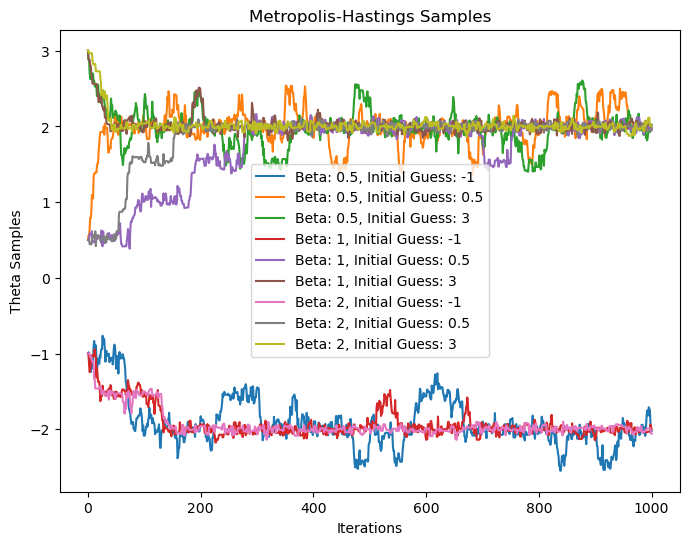

'--------------------Write your code above this line------------------------------'

In [32]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def phi4(theta):
    return theta**4 - 8 * theta**2 - 2 * np.cos(4 * np.pi * theta) + np.random.normal(0, 0.1)

def metropolis_hastings(initial_theta, beta, sigma, num_iterations):
    current_theta = initial_theta
    samples = [current_theta]

    for _ in range(num_iterations):
        proposed_theta = np.random.normal(current_theta, sigma)
        delta_H = phi4(proposed_theta) - phi4(current_theta)
        acceptance_ratio = np.exp(-beta * delta_H)

        if acceptance_ratio > 1 or np.random.rand() < acceptance_ratio:
            current_theta = proposed_theta

        samples.append(current_theta)

    return samples

initial_guesses = [-1, 0.5, 3]
betas = [0.5, 1, 2]
sigma = 0.1  

for beta in betas:
    for initial_guess in initial_guesses:
        samples = metropolis_hastings(initial_guess, beta, sigma, num_iterations=1000)

plt.figure(figsize=(8, 6))

for beta in betas:
    for initial_guess in initial_guesses:
        samples = metropolis_hastings(initial_guess, beta, sigma, num_iterations=1000)
        plt.plot(samples, label=f'Beta: {beta}, Initial Guess: {initial_guess}')

plt.xlabel('Iterations')
plt.ylabel('Theta Samples')
plt.legend()
plt.title('Metropolis-Hastings Samples')
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

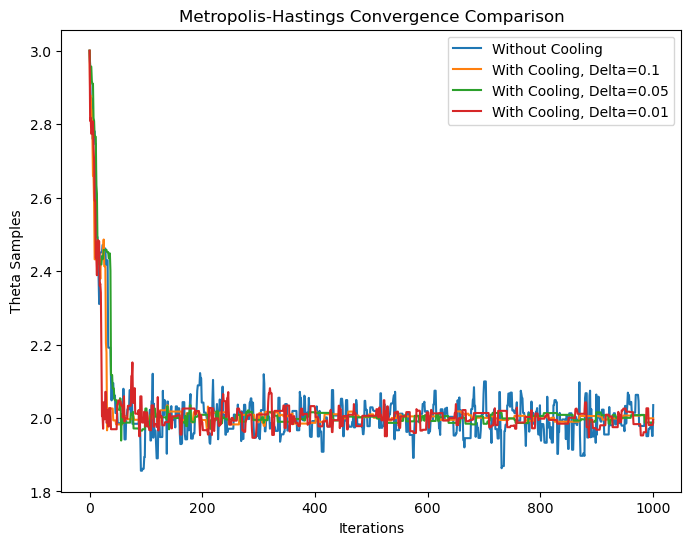

'--------------------Write your code above this line------------------------------'

In [33]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np

def metropolis_hastings_with_cooling(initial_theta, initial_beta, delta_schedule, sigma, num_iterations=1000):
    theta = initial_theta
    beta = initial_beta
    iteration = 0
    theta_list = [theta]
    
    for iteration in range(num_iterations):
        proposal = theta + np.random.normal(0, sigma)
        
        delta_energy = objective_function(proposal) - objective_function(theta)
        
        metropolis = np.exp(-beta * delta_energy)
        
        if np.random.rand() < metropolis:
            theta = proposal
        
        theta_list.append(theta)
        
        # cooling schedule
        beta += delta_schedule
        
    return theta_list

# Metropolis-Hastings without cooling 
samples_no_cooling = metropolis_hastings(initial_guess, beta, sigma, num_iterations=1000)

# Metropolis-Hastings with cooling 
cooling_schedules = [0.1, 0.05, 0.01] 
samples_with_cooling = []

for delta_schedule in cooling_schedules:
    samples = metropolis_hastings_with_cooling(initial_guess, beta, delta_schedule, sigma, num_iterations=1000)
    samples_with_cooling.append(samples)

plt.figure(figsize=(8, 6))
plt.plot(samples_no_cooling, label='Without Cooling')

for i, samples in enumerate(samples_with_cooling):
    plt.plot(samples, label=f'With Cooling, Delta={cooling_schedules[i]}')

plt.xlabel('Iterations')
plt.ylabel('Theta Samples')
plt.legend()
plt.title('Metropolis-Hastings Convergence Comparison')
plt.show()

'''--------------------Write your code above this line------------------------------'''